# Face Model Demo

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
%matplotlib inline
import os

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', -1)

In [0]:
from keras.utils.np_utils import to_categorical
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder

In [0]:
from keras.layers import Dense

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, BatchNormalization, Activation
from keras.models import Model
from keras import backend as K

In [0]:
from keras.utils import plot_model

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
face_path = '/content/drive/My Drive/Demo Datasets/face data'

In [0]:
train_data = pd.read_csv(os.path.join(face_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(face_path, 'test.csv'))

In [12]:
train_data.head()

,Unnamed: 0,files,image,speaker,speaker_count,present
0,0,/content/drive/My Drive/Demo Datasets/face data/faces94/malestaff/tony/tony.18.jpg,tony.18.jpg,tony,20,yes
1,1,/content/drive/My Drive/Demo Datasets/face data/faces94/male/whussa/whussa.19.jpg,whussa.19.jpg,whussa,20,yes
2,2,/content/drive/My Drive/Demo Datasets/face data/faces94/male/vpsavo/vpsavo.6.jpg,vpsavo.6.jpg,vpsavo,20,yes
3,3,/content/drive/My Drive/Demo Datasets/face data/faces94/female/yfhsie/yfhsie.11.jpg,yfhsie.11.jpg,yfhsie,20,yes
4,4,/content/drive/My Drive/Demo Datasets/face data/faces94/male/whussa/whussa.6.jpg,whussa.6.jpg,whussa,20,yes


In [13]:
test_data.head()

,Unnamed: 0,files,image,speaker,speaker_count,present
0,0,/content/drive/My Drive/Demo Datasets/face data/faces94/female/yfhsie/yfhsie.13.jpg,yfhsie.13.jpg,yfhsie,20,yes
1,1,/content/drive/My Drive/Demo Datasets/face data/faces94/female/yfhsie/yfhsie.15.jpg,yfhsie.15.jpg,yfhsie,20,yes
2,2,/content/drive/My Drive/Demo Datasets/face data/faces94/male/wjalbe/wjalbe.17.jpg,wjalbe.17.jpg,wjalbe,20,yes
3,3,/content/drive/My Drive/Demo Datasets/face data/faces94/malestaff/tony/tony.11.jpg,tony.11.jpg,tony,20,yes
4,4,/content/drive/My Drive/Demo Datasets/face data/faces94/male/svkriz/svkriz.11.jpg,svkriz.11.jpg,svkriz,20,yes


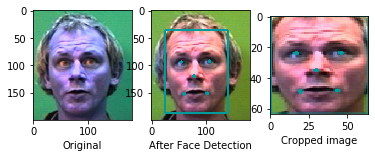

In [14]:
detector = MTCNN()
original_image = []
detected_face = []
cropped_image = []
label = []

for i in range(len(train_data)):
  img_0 = cv2.imread(train_data['files'][i])
  img_1 = cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB)
  original_image.append(img_0)
  faces = detector.detect_faces(img_1)
  for face in faces:
    for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
      cv2.circle(img_1, a, 2, (0,155,155), 2)
      cv2.circle(img_1, b, 2, (0,155,155), 2)
      cv2.circle(img_1, c, 2, (0, 155, 155), 2)
      cv2.circle(img_1, d, 2, (0,155,155), 2)
      cv2.circle(img_1, e, 2, (0,155,155), 2)
    for (x,y,w,h) in [face['box']]:
      detected_faces = cv2.rectangle(img_1, (x,y), (x+w, y+h), (0,155,155), 2)
      detected_face.append(detected_faces)
      roi = img_1[y:y+h, x:x+w]
      roi = cv2.resize(roi, (64,64))
      cropped_image.append(roi)
      label.append(train_data['speaker'][i])
fig, ax = plt.subplots(1, 3)
ax[0].imshow(original_image[0])
ax[0].set_xlabel('Original')
ax[1].imshow(detected_face[0])
ax[1].set_xlabel('After Face Detection')
ax[2].imshow(cropped_image[0])
ax[2].set_xlabel('Cropped image')
plt.show()

In [0]:
X_train = np.array(cropped_image)
y_train = np.array(label)

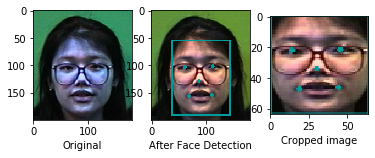

In [16]:
detector = MTCNN()
original_image = []
detected_face = []
cropped_image = []
label = []

for i in range(len(test_data)):
  img_0 = cv2.imread(test_data['files'][i])
  img_1 = cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB)
  original_image.append(img_0)
  faces = detector.detect_faces(img_1)
  for face in faces:
    for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
      cv2.circle(img_1, a, 2, (0,155,155), 2)
      cv2.circle(img_1, b, 2, (0,155,155), 2)
      cv2.circle(img_1, c, 2, (0, 155, 155), 2)
      cv2.circle(img_1, d, 2, (0,155,155), 2)
      cv2.circle(img_1, e, 2, (0,155,155), 2)
    for (x,y,w,h) in [face['box']]:
      detected_faces = cv2.rectangle(img_1, (x,y), (x+w, y+h), (0,155,155), 2)
      detected_face.append(detected_faces)
      roi = img_1[y:y+h, x:x+w]
      roi = cv2.resize(roi, (64,64))
      cropped_image.append(roi)
      label.append(test_data['speaker'][i])
fig, ax = plt.subplots(1, 3)
ax[0].imshow(original_image[0])
ax[0].set_xlabel('Original')
ax[1].imshow(detected_face[0])
ax[1].set_xlabel('After Face Detection')
ax[2].imshow(cropped_image[0])
ax[2].set_xlabel('Cropped image')
plt.show()

In [0]:
X_test = np.array(cropped_image)
y_test = np.array(label)

In [0]:
df = pd.DataFrame(columns = ['Actual Label'])
df['Actual Label'] = y_test
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
X_test = X_test/255.0
X_train = X_train/255.0
X_val = X_train[128:]
y_val = y_train[128:]
X_train = X_train[:128]
y_train = y_train[:128]

In [19]:
face_model = load_model('/content/drive/My Drive/case studies 2/Models/Face Models/Model 1/pretrained_face_best_weights.h5')





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [20]:
face_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1849

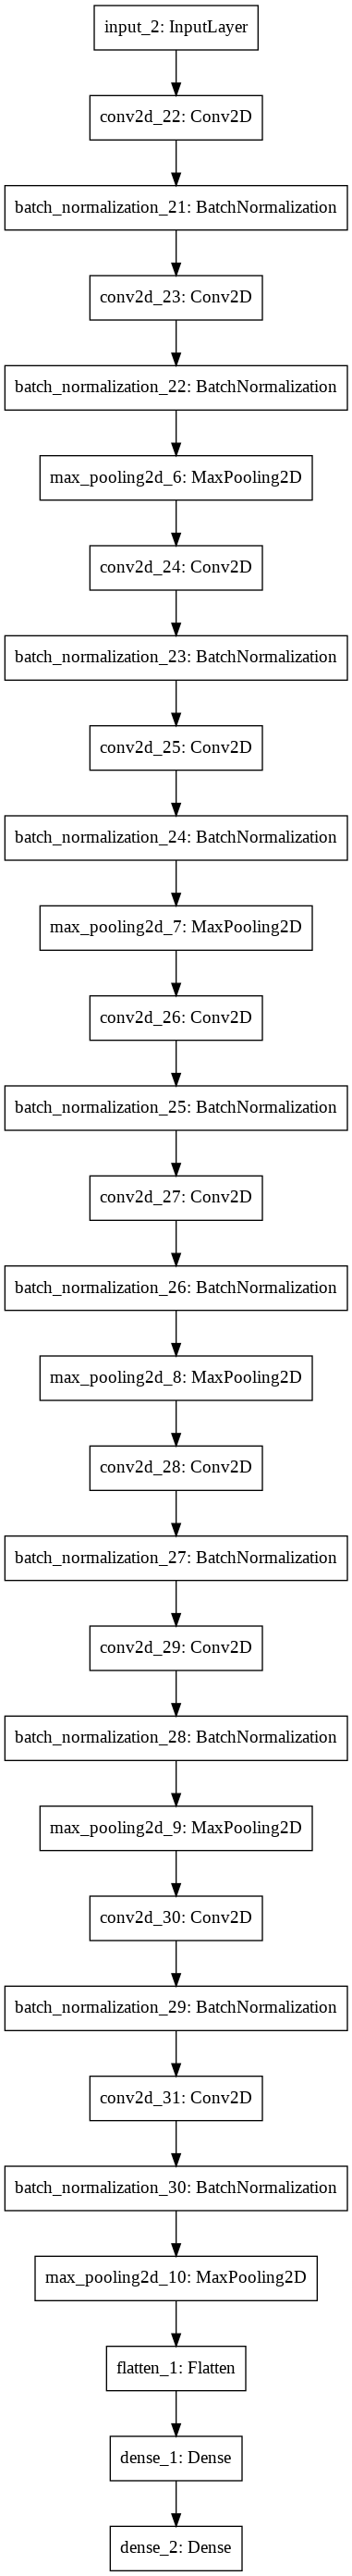

In [21]:
plot_model(face_model, to_file='model.png')

In [22]:
face_model.layers.pop()

In [23]:
face_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1849

In [0]:
input_img = Input(shape = (64, 64, 3))
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2), padding = 'same')(x)

x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(10, activation = 'softmax')(x)

In [0]:
new_model = Model(input_img, output)

In [0]:
new_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [0]:
new_model.set_weights(face_model.get_weights())

In [28]:
new_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        1849

In [29]:
new_model_history = new_model.fit(X_train, y_train, epochs = 10, batch_size = 256, verbose = 1, validation_data = [X_val, y_val])

Train on 128 samples, validate on 38 samples
Epoch 1/10
128/128 [==============================] - 10s 79ms/step - loss: 11.7470 - acc: 0.0312 - val_loss: 5.1113 - val_acc: 0.4737
Epoch 2/10
128/128 [==============================] - 7s 58ms/step - loss: 5.5023 - acc: 0.5156 - val_loss: 4.7554 - val_acc: 0.5789
Epoch 3/10
128/128 [==============================] - 7s 58ms/step - loss: 4.7357 - acc: 0.6797 - val_loss: 4.0874 - val_acc: 0.6316
Epoch 4/10
128/128 [==============================] - 7s 57ms/step - loss: 3.5716 - acc: 0.7344 - val_loss: 3.5238 - val_acc: 0.6842
Epoch 5/10
128/128 [==============================] - 8s 62ms/step - loss: 3.4872 - acc: 0.7500 - val_loss: 3.0749 - val_acc: 0.7632
Epoch 6/10
128/128 [==============================] - 8s 59ms/step - loss: 3.4067 - acc: 0.7891 - val_loss: 2.9733 - val_acc: 0.8158
Epoch 7/10
128/128 [==============================] - 8s 60ms/step - loss: 3.4010 - acc: 0.7891 - val_loss: 2.9693 - val_acc: 0.8158
Epoch 8/10
128/128 [==

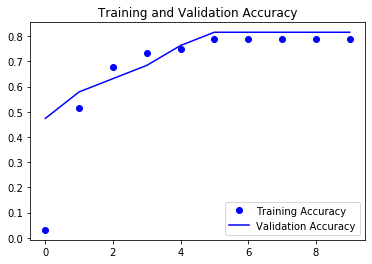

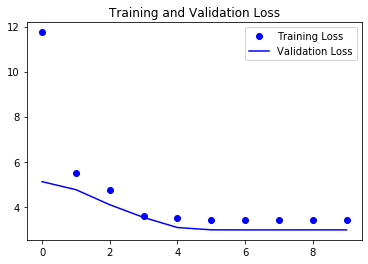

In [30]:
accuracy = new_model_history.history['acc']
val_accuracy = new_model_history.history['val_acc']
loss = new_model_history.history['loss']
val_loss = new_model_history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [0]:
test_eval = new_model.evaluate(X_test, y_test, verbose = 0)

In [32]:
print('Test loss : ', test_eval[0])
print('Test accuracy : ', test_eval[1])

Test loss :  3.0701346567698886
Test accuracy :  0.8095238038471767


In [0]:
predicted_classes = new_model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes = lb.inverse_transform(predicted_classes)
df['predicted_label'] = predicted_classes

In [34]:
df[df['Actual Label'] != df['predicted_label']]

,Actual Label,predicted_label
9,voudcx,vstros
15,whussa,svkriz
16,whussa,vstros
17,voudcx,vstros
20,whussa,svkriz
30,whussa,svkriz
31,voudcx,vstros
40,voudcx,vstros


In [35]:
print(str((1-round(len(df[df['Actual Label'] != df['predicted_label']])/len(df),3))*100) + ' percent of the labels are correctly predicted')

81.0 percent of the labels are correctly predicted


In [36]:
K.clear_session()

# Voice Model Demo

In [0]:
import librosa

In [0]:
voice_path = '/content/drive/My Drive/Demo Datasets/voice data'

In [0]:
train_data = pd.read_csv(os.path.join(voice_path, 'train_data.csv'))
test_data = pd.read_csv(os.path.join(voice_path, 'test_data.csv'))

In [40]:
train_data.head()

,Unnamed: 0,files,file_name,speaker,speaker_count
0,1266,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/6_nicolas_23.wav,6_nicolas_23.wav,nicolas,500
1,939,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/4_theo_44.wav,4_theo_44.wav,theo,500
2,1259,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/6_nicolas_17.wav,6_nicolas_17.wav,nicolas,500
3,929,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/4_theo_35.wav,4_theo_35.wav,theo,500
4,1822,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/9_jackson_29.wav,9_jackson_29.wav,jackson,500


In [41]:
test_data.head()

,Unnamed: 0,files,file_name,speaker,speaker_count
0,1655,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/8_nicolas_13.wav,8_nicolas_13.wav,nicolas,500
1,1654,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/8_nicolas_12.wav,8_nicolas_12.wav,nicolas,500
2,934,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/4_theo_4.wav,4_theo_4.wav,theo,500
3,1817,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/9_jackson_24.wav,9_jackson_24.wav,jackson,500
4,794,/content/drive/My Drive/Demo Datasets/voice data/free-spoken-digit-dataset/recordings/3_yweweler_49.wav,3_yweweler_49.wav,yweweler,500


In [0]:
mfcc = []
label = []

for i in range(len(train_data)):
  X, sample_rate = librosa.load(train_data['files'][i], res_type = 'kaiser_fast')
  mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sample_rate, n_mfcc = 40).T, axis = 0)
  mfcc.append(mfccs)
  label.append(train_data['speaker'][i])


In [0]:
X = np.array(mfcc)
X_train = X[:64]
X_val = X[64:]

y = np.array(label)
y_train = y[:64]
y_val = y[64:]

In [0]:
mfcc = []
label = []

for i in range(len(test_data)):
  X, sample_rate = librosa.load(test_data['files'][i], res_type = 'kaiser_fast')
  mfccs = np.mean(librosa.feature.mfcc(y = X, sr = sample_rate, n_mfcc = 40).T, axis = 0)
  mfcc.append(mfccs)
  label.append(test_data['speaker'][i])


In [0]:
X_test = np.array(mfcc)
y_test = np.array(label)


In [0]:
df = pd.DataFrame(columns = ['Actual Label'])
df['Actual Label'] = label

In [0]:
lb = LabelEncoder()
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))
y_test = to_categorical(lb.fit_transform(y_test))

In [0]:
voice_model = load_model('/content/drive/My Drive/case studies 2/Models/Voice Models/MFCC/pretrained_voice_best_weights.h5')

In [49]:
voice_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 40)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               4224

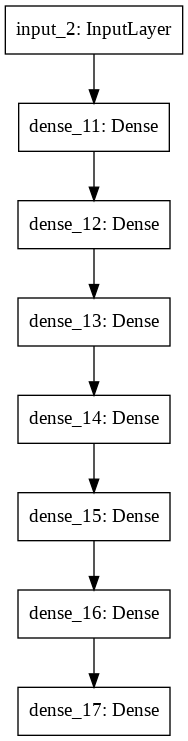

In [50]:
plot_model(voice_model, to_file='model.png')

In [51]:
voice_model.layers.pop()

In [52]:
voice_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 40)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               5248      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               4224

In [0]:
input = Input(shape = (40, ))
x = Dense(128, activation = 'relu')(input)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
encoded = Dense(32, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(encoded)
output = Dense(4, activation = 'softmax')(x)

In [0]:
new_model = Model(input, output)

In [0]:
new_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [0]:
new_model.set_weights(voice_model.get_weights())

In [57]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               5248      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224

In [58]:
new_model_history = new_model.fit(X_train, y_train, epochs = 10, batch_size = 256, verbose = 1, validation_data = [X_val, y_val])

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 0s 6ms/step - loss: 4.7646 - acc: 0.1719 - val_loss: 2.7248 - val_acc: 0.3125
Epoch 2/10
64/64 [==============================] - 0s 73us/step - loss: 3.8478 - acc: 0.2500 - val_loss: 2.1397 - val_acc: 0.3125
Epoch 3/10
64/64 [==============================] - 0s 85us/step - loss: 2.9852 - acc: 0.3125 - val_loss: 1.6252 - val_acc: 0.3750
Epoch 4/10
64/64 [==============================] - 0s 78us/step - loss: 2.2339 - acc: 0.3750 - val_loss: 1.1983 - val_acc: 0.5000
Epoch 5/10
64/64 [==============================] - 0s 99us/step - loss: 1.5775 - acc: 0.5312 - val_loss: 0.8662 - val_acc: 0.6250
Epoch 6/10
64/64 [==============================] - 0s 99us/step - loss: 1.0763 - acc: 0.5781 - val_loss: 0.5975 - val_acc: 0.6875
Epoch 7/10
64/64 [==============================] - 0s 98us/step - loss: 0.7216 - acc: 0.7031 - val_loss: 0.4058 - val_acc: 0.7500
Epoch 8/10
64/64 [======================

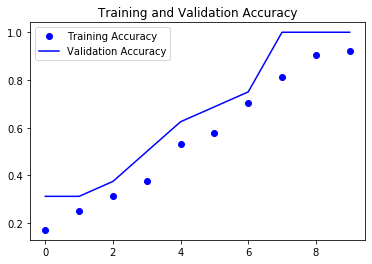

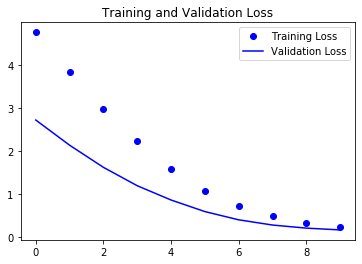

In [59]:
accuracy = new_model_history.history['acc']
val_accuracy = new_model_history.history['val_acc']
loss = new_model_history.history['loss']
val_loss = new_model_history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [0]:
test_eval = new_model.evaluate(X_test, y_test, verbose = 0)

In [61]:
print('Test loss : ', test_eval[0])
print('Test accuracy : ', test_eval[1])

Test loss :  0.6919472813606262
Test accuracy :  0.8500000238418579


In [0]:
predicted_classes = new_model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes = lb.inverse_transform(predicted_classes)
df['predicted_label'] = predicted_classes

In [63]:
df[df['Actual Label'] != df['predicted_label']]

,Actual Label,predicted_label
0,nicolas,jackson
4,yweweler,jackson
9,nicolas,jackson
11,jackson,theo
17,theo,yweweler


In [64]:
print(str((1-round(len(df[df['Actual Label'] != df['predicted_label']])/len(df),3))*100) + ' percent of the labels are correctly predicted')

75.0 percent of the labels are correctly predicted


In [0]:
K.clear_session()